In [29]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(shiny)
library(hdf5r)

In [30]:
#spatial 
data_dir1 = "/storage/home/hpaceice1/msun330/BIOl_project/spatial/Anterior/spatial"

data_dir2 = "/storage/home/hpaceice1/msun330/BIOl_project/spatial/Anterior"


Anterior.brain = Seurat::Read10X_Image(data_dir1, image.name = 'tissue_lowres_image.png')
brain1 = Load10X_Spatial(data.dir=data_dir2,
                        filename = 'V1_Mouse_Brain_Sagittal_Anterior_Section_2_filtered_feature_bc_matrix.h5',
                        assay='Spatial',
                        slice='slice1',
                        image = Anterior.brain
)

In [3]:
brain1@project.name <-"anterior"
Idents(brain1) <-"anterior"
brain1$orig.ident <-"anterior"

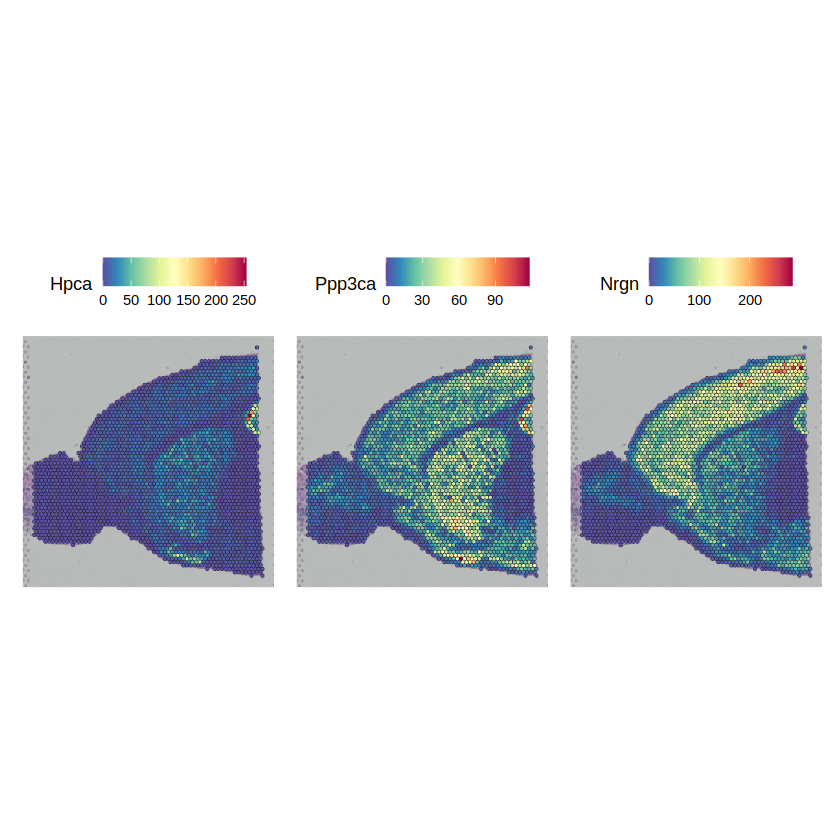

In [31]:
SpatialFeaturePlot(brain1, features = c("Hpca", "Ppp3ca","Nrgn"))

In [5]:
brain1 <- SCTransform(brain1, assay = "Spatial", ncells = 3000, verbose = FALSE)
brain1 <- RunPCA(brain1)
brain1 <- RunUMAP(brain1, dims = 1:30)
brain1 <- FindNeighbors(brain1, dims = 1:30)
brain1 <- FindClusters(brain1, verbose = FALSE)

PC_ 1 
Positive:  Nrgn, Snap25, Cck, Olfm1, Slc17a7, Camk2n1, Vsnl1, Nptxr, Calm1, Calm2 
	   Ywhah, Rtn1, 1110008P14Rik, Lingo1, Vxn, Nrn1, Camk2a, Chn1, Basp1, Enc1 
	   Scn1b, Dnm1, Stx1a, Prkar1b, Slc30a3, Atp6v0c, Ttc9b, Stmn2, Clstn1, Sv2b 
Negative:  Plp1, Mbp, Mobp, Apod, Trf, Cnp, Mal, Cldn11, Mag, Ttr 
	   Plekhb1, Qdpr, Ptgds, Cryab, Car2, Mog, Fth1, Tspan2, Bcas1, Enpp2 
	   Scd2, Penk, Gatm, Dbi, Sept4, Gsn, Ndrg1, Ermn, Apoe, Gfap 
PC_ 2 
Positive:  Calb2, Fabp7, Doc2g, Gng4, Slc6a11, Apoe, Cdhr1, Pcbp3, S100a5, Shisa8 
	   Th, Csdc2, Nrip3, Gpsm1, Dbi, Dlx1, Sparcl1, Nmb, Islr, Gad1 
	   Inpp5j, Cpne6, Ppm1e, Ptgds, Ptpro, Sp8, Atp1a2, Eomes, Gnas, Cpne4 
Negative:  Ppp1r1b, Gpr88, Penk, Pde10a, Hpca, Pcp4, Pde1b, Scn4b, Rgs9, Tac1 
	   Adcy5, Ppp3ca, Arpp21, Rasd2, Gng7, Adora2a, Lrrc10b, Drd2, Kcnab1, Ttr 
	   Nrgn, Syndig1l, Drd1, Tmem158, Ptpn5, Arpp19, Gnal, St8sia3, Ngef, Gpr6 
PC_ 3 
Positive:  Fth1, Plp1, Mbp, Cryab, Trf, Mobp, Cnp, Mal, Cck, Mag 
	   Qdpr, Cldn1

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


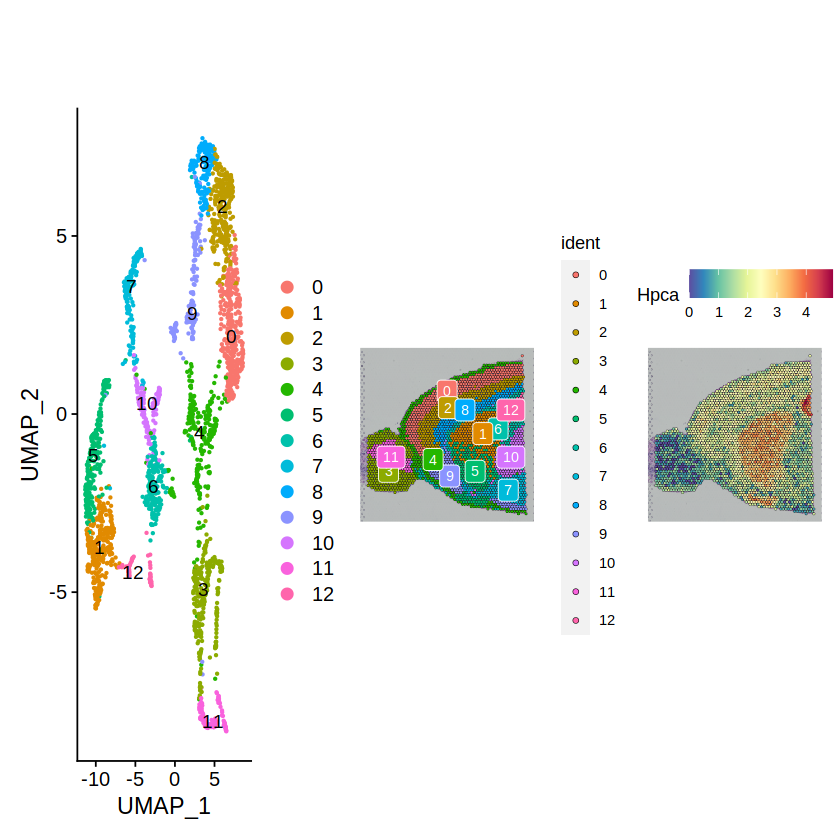

In [9]:
p1 <- DimPlot(brain1, reduction = "umap", label = TRUE)
p2 <- SpatialDimPlot(brain1, label = TRUE, label.size = 3)
p3 = SpatialFeaturePlot(brain1, features = c("Hpca"))
p1 + p2 + p3

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


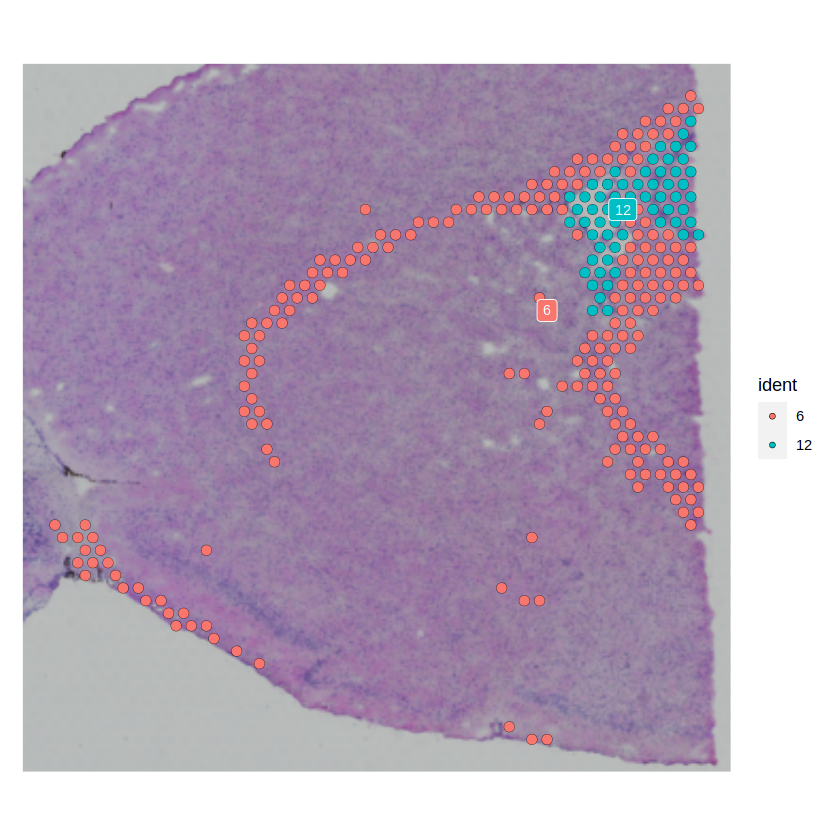

In [10]:
hippocampus <- subset(brain1, idents = c(6, 12))
p_img <- SpatialDimPlot(hippocampus, crop = TRUE, label = TRUE, label.size = 3)
p_img

In [12]:
img<- GetTissueCoordinates(hippocampus)
ident <- Idents(hippocampus)
imgId <- data.frame(img,ident)
head(imgId)

imagerow imagecol ident
AAACCCGAACGAAATC-1 361.9105 490.1721 6    
AAACCGTTCGTCCAGG-1 405.2324 230.7573 6    
AAACTCGTGATATAAG-1 225.9036 483.0981 6    
AAATAAGGTAGTGCCC-1 275.3701 490.1721 6    
AAATGATTCGATCAGC-1 213.5112 475.9725 6    
AAATTACCTATCGATG-1 244.4406 415.5594 6

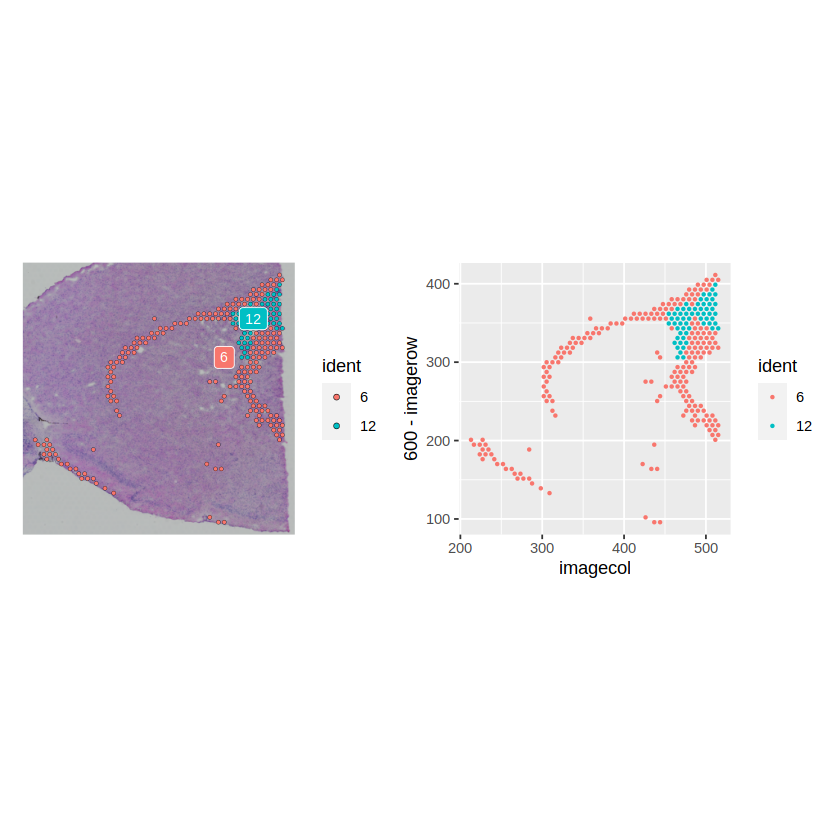

In [13]:
p_plot <- ggplot(img, aes(x=imagecol, y=600-imagerow,color = ident)) +
geom_point(size = 0.6)
p_img+p_plot
 

In [26]:
hippocampus_final <- subset(hippocampus, slice1_imagerow > 310 | slice1_imagecol < 450, invert = TRUE)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


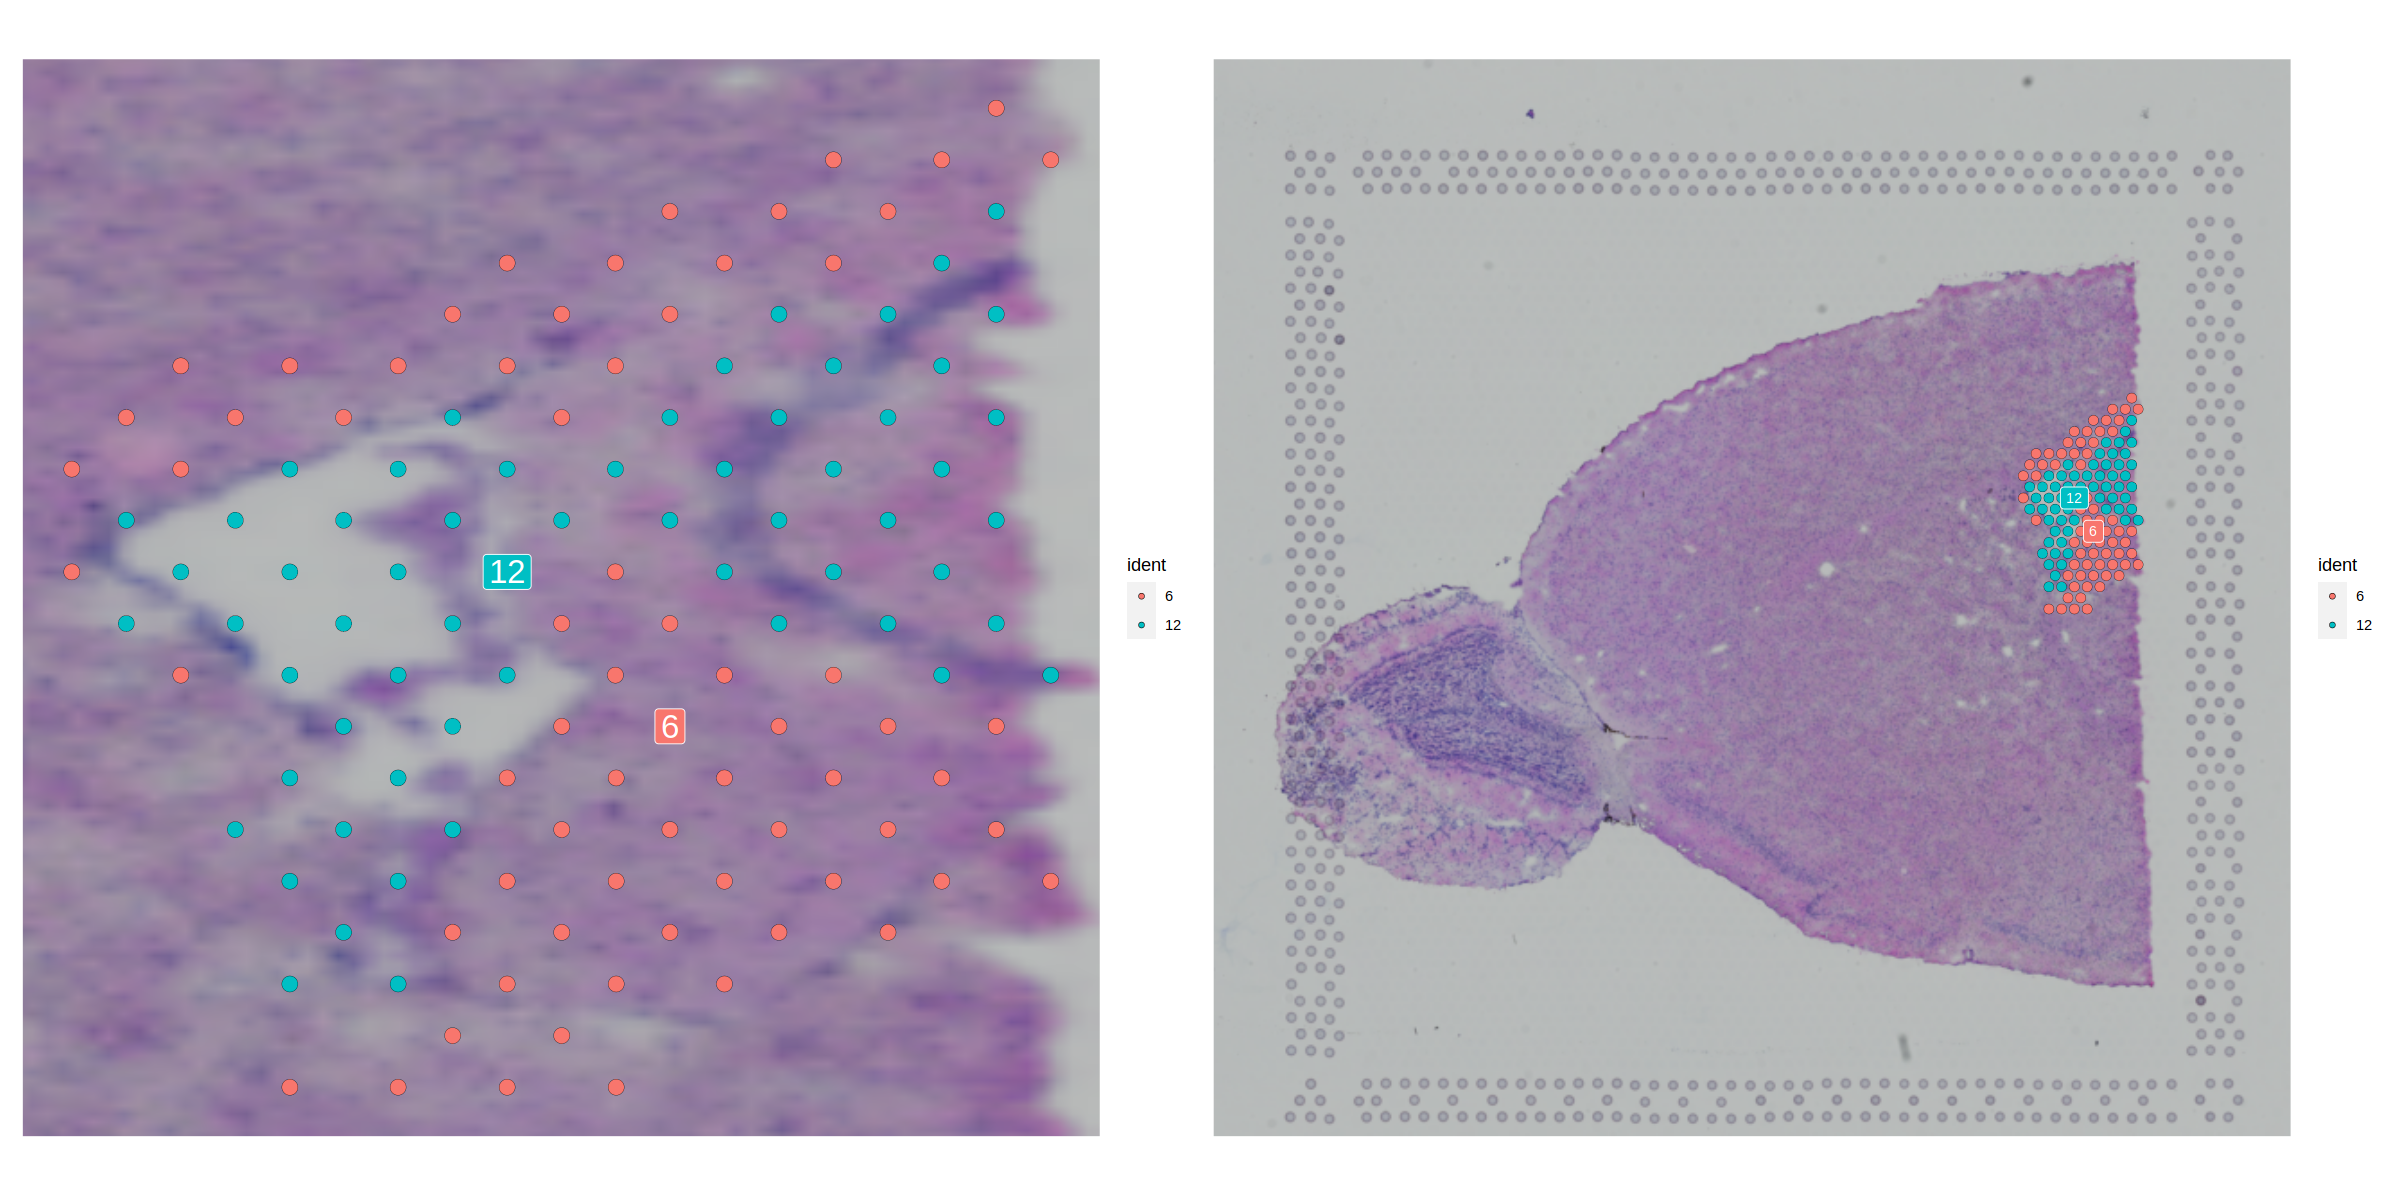

In [41]:
p1 <- SpatialDimPlot(hippocampus_final, crop = TRUE, label = TRUE)
p2 <- SpatialDimPlot(hippocampus_final, crop = FALSE, label = TRUE, pt.size.factor = 1, label.size = 3)
p1 + p2

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



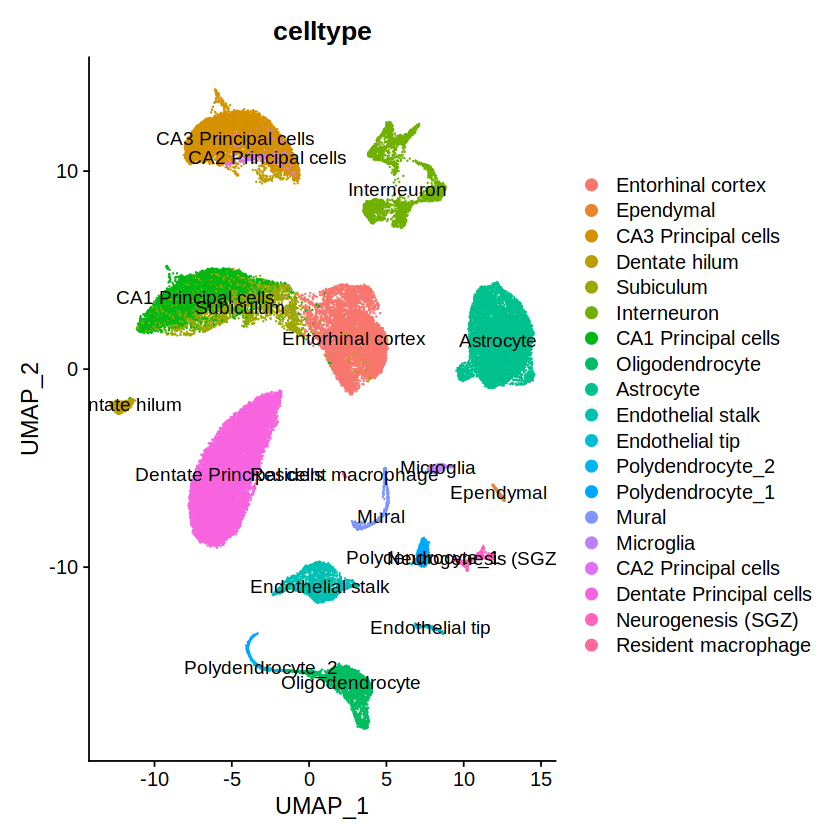

In [32]:
#single-cell
hippocampus.all<-readRDS("mouse_hippocampus_reference.rds")
hippocampus.all = UpdateSeuratObject(object = hippocampus.all)
# hippocampus.all <- SCTransform(hippocampus.all, ncells = 3000, verbose = FALSE) %>%
#   RunPCA(verbose = FALSE) %>%
#   RunUMAP(dims = 1:30)
DimPlot(hippocampus.all, group.by = "celltype", label = TRUE)

In [33]:


anchors <- FindTransferAnchors(reference = hippocampus.all, query = hippocampus_final,
                               reference.assay = 'SCT', query.assay = 'SCT',
                               , normalization.method = "SCT", verbose = T, reduction = 'cca')
predictions.assay <- TransferData(anchorset = anchors, refdata = hippocampus.all$celltype, prediction.assay = TRUE,
                                  weight.reduction = hippocampus_final[["pca"]], dims = 1:30)
hippocampus_final[["predictions"]] <- predictions.assay


Normalizing query using reference SCT model

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Fewer than 50 features used as input for CCA.”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 616 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


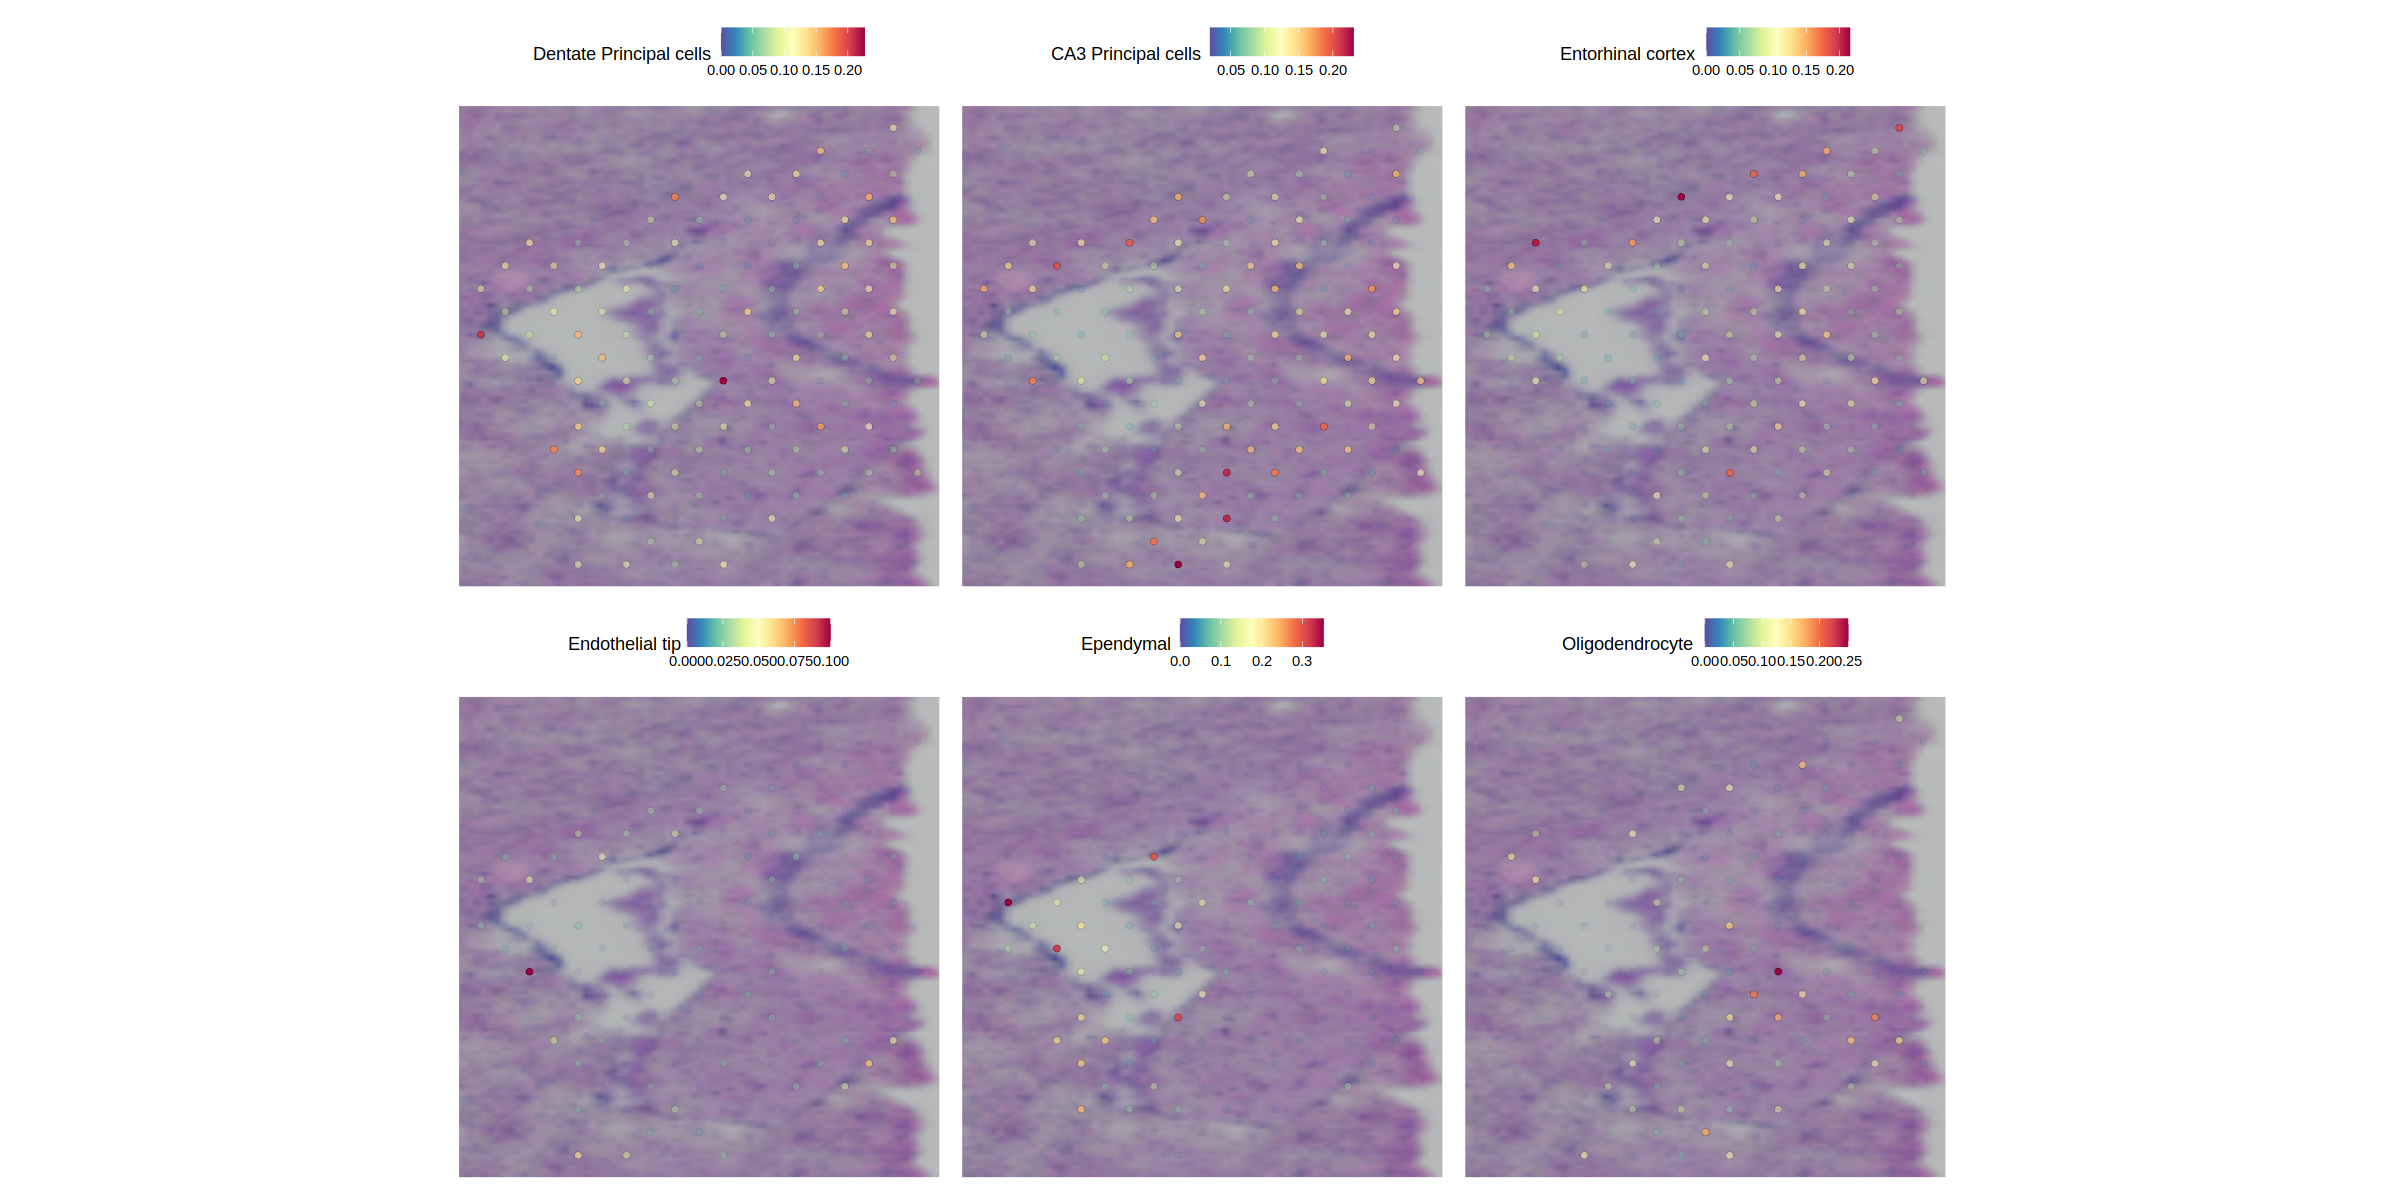

In [36]:
options(repr.plot.width = 20, repr.plot.height = 10)
DefaultAssay(hippocampus_final) <- "predictions"
SpatialFeaturePlot(hippocampus_final, features = c("Dentate Principal cells", "CA3 Principal cells", "Entorhinal cortex",
    "Endothelial tip", "Ependymal", "Oligodendrocyte"), alpha = c(0.1, 1))

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


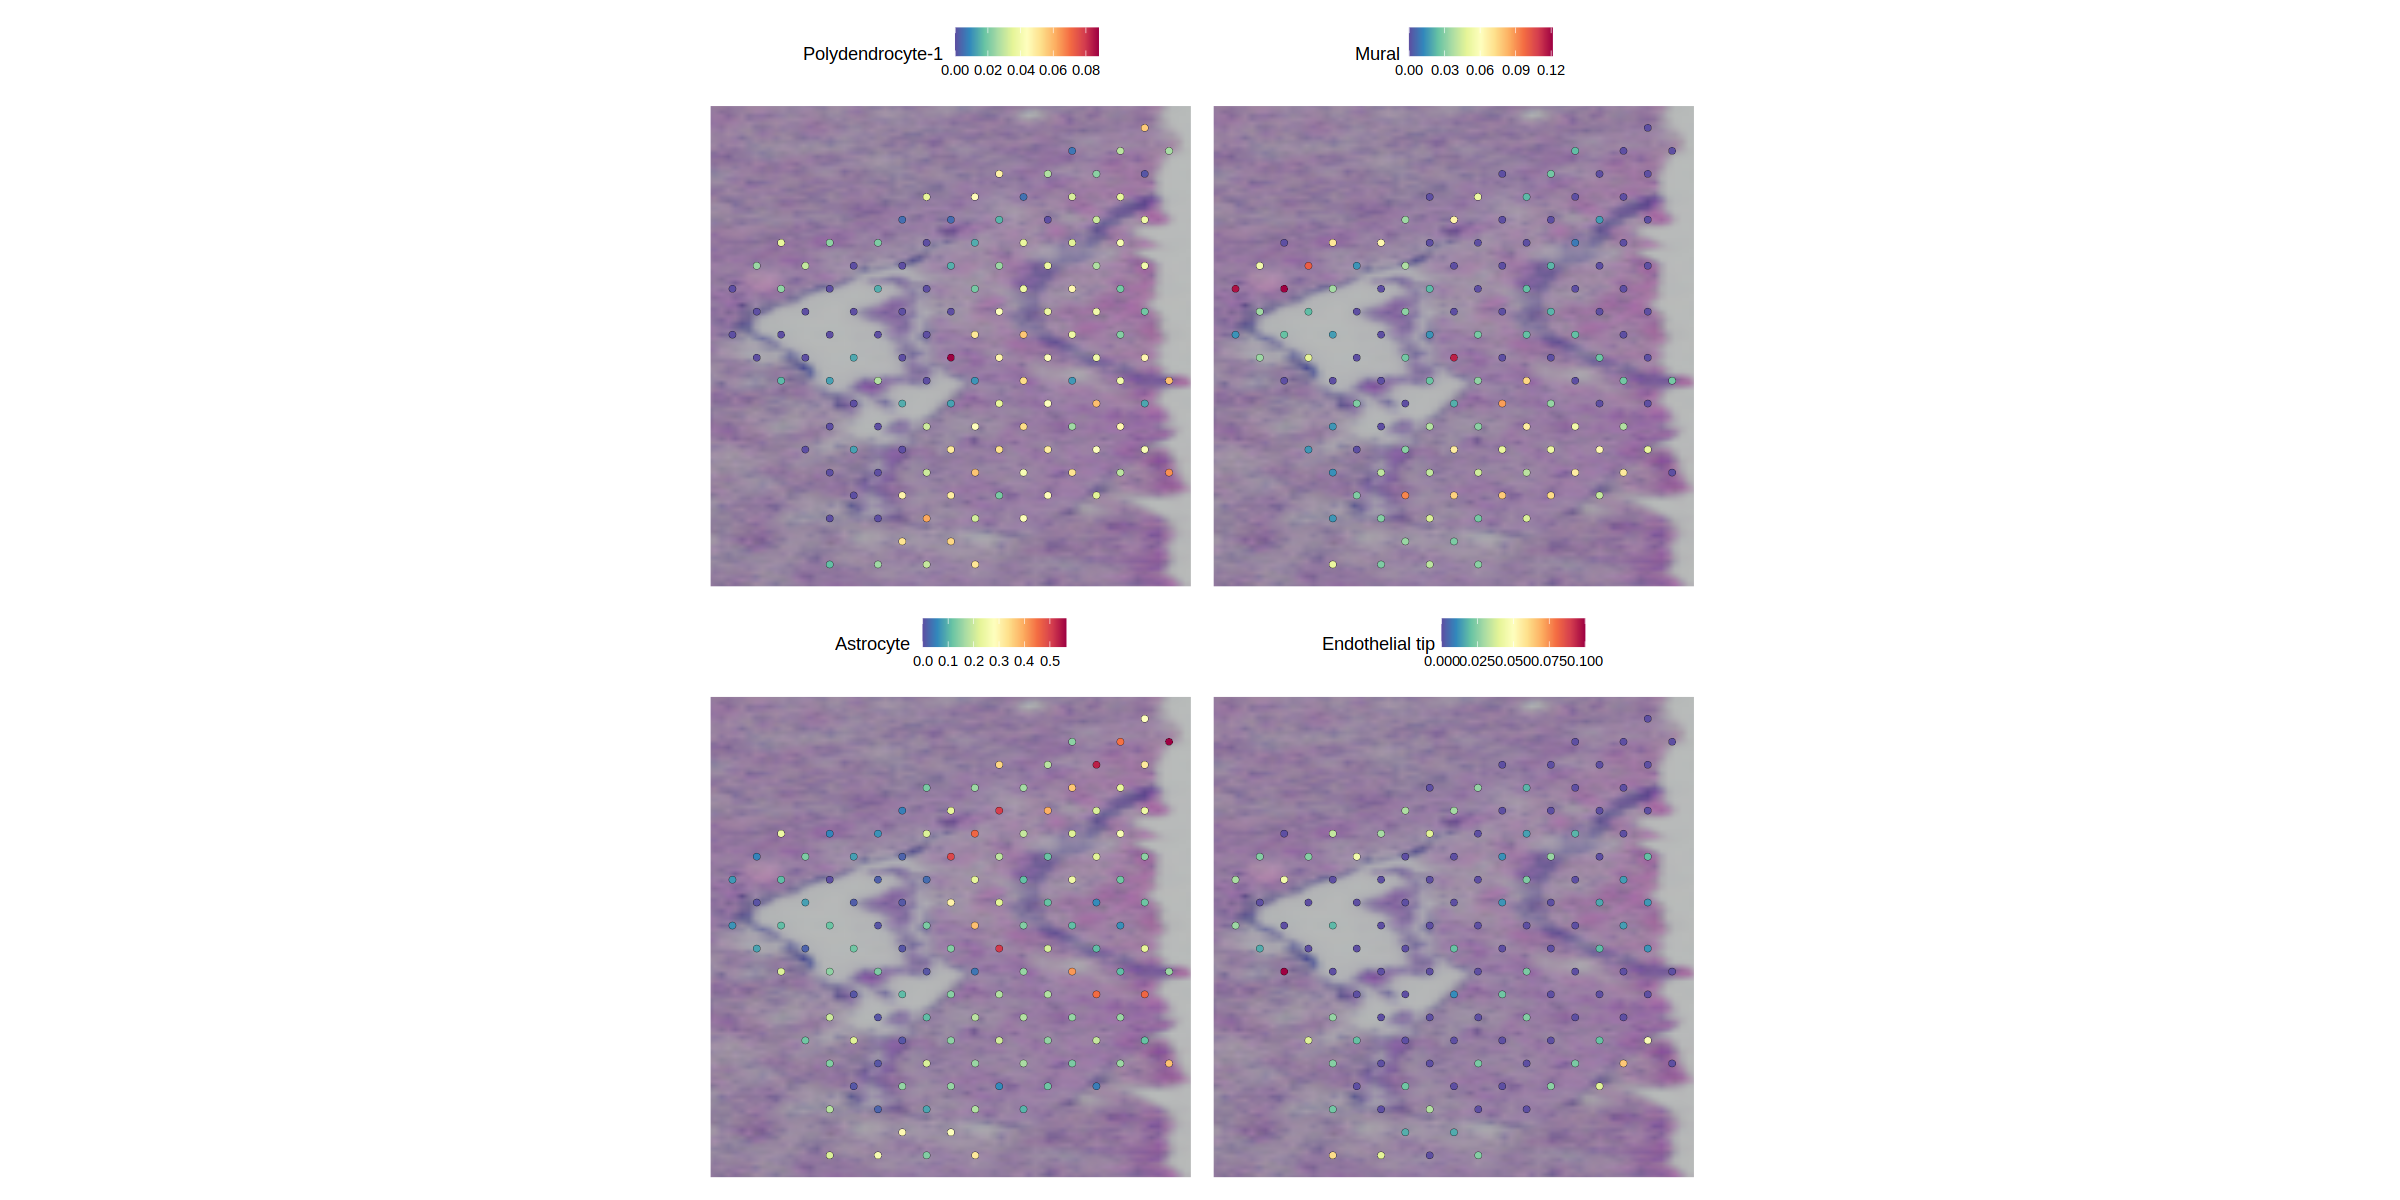

In [37]:
# high variable cell type
hippocampus_final <- FindSpatiallyVariableFeatures(hippocampus_final, assay = "predictions", selection.method = "markvariogram",
    features = rownames(hippocampus_final), r.metric = 5, slot = "data")
top.clusters <- head(SpatiallyVariableFeatures(hippocampus_final), 4)
SpatialPlot(object = hippocampus_final, features = top.clusters, ncol = 2)